In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

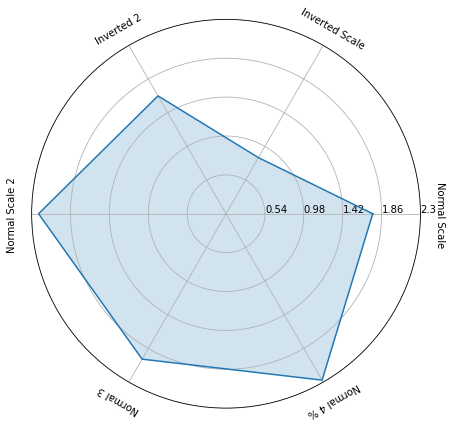

In [13]:
def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges, n_ordinate_levels=6, should_label_all = False):
        """
        Initializes the ComplexRadar instance which is in charge for plotting a radar plot, or spider plot
        as it is commonly known.
        :param fig: Figure on which the graph will be plotted
        :param variables: Variables for which the data is given, their names will be written on angles of circle
        :param ranges: Either a list of ranges in format (start, end) or a single tuple entry of (start, end) where it is assumed that all variables will have same range
        :param n_ordinate_levels: amount of levels inside circle which will represent divided range, default is 6
        :param should_label_all: Whether grid labels for every variable should be written, default is False, and this is recommended to be true when there are variable ranges
        :return Nothing
        """
        angles = np.arange(0, 360, 360./len(variables))
        
        self.should_scale = False
        self.should_label_all = should_label_all
        
        if len(ranges) == 0:
            for i in range(len(variables)-1):
                ranges.append(ranges[0]) # same range for every category
        else:
            first_d1, first_d2 = ranges[0]
            for d_1, d_2 in ranges[1:]:
                if d_1 > first_d2 or d_2 > first_d2:
                    self.should_scale = True
        
        if self.should_label_all:
            axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True, \
                label = "axes{}".format(i)) for i in range(len(variables))]
        else:
            axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True, label = "axes{}")]
        
        # Place text for variables
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        
        if self.should_label_all:
            for ax in axes[1:]:
                ax.patch.set_visible(False)
                ax.grid("off")
                ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
            
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        if self.should_scale:
            # Scaling if we have different ranges of data
            sdata = _scale_data(data, self.ranges)
        else:
            sdata = data
        # np.r_ brings first number to the end and copmletes a circle
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        if self.should_scale:
            sdata = _scale_data(data, self.ranges)
        else:
            sdata = data
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)


# example data
variables = ("Normal Scale", "Inverted Scale", "Inverted 2", 
            "Normal Scale 2", "Normal 3", "Normal 4 %")
data = (1.76, 1.1, 1.2, 
        4.4, 3.4, 86.8)
ranges = [(0.1, 2.3), (1.5, 0.3), (0.5, 1.5),
         (1.7, 4.5), (1.5, 3.7), (70, 87)]            
# plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data)
radar.fill(data, alpha=0.2)
plt.show()    